In [138]:

%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn
%pip install mlxtend
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.


In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.read_excel("Cassava_Yield_Data.xlsx")


,Sesn,locn,block,rep,tillage,ferT,Plants_harvested,No_bigtubers,Weigh_bigtubers,No_mediumtubers,Weight_mediumtubers,No_smalltubers,Weight_smalltubers,Totaltuberno,AV_tubers_Plant,Total_tubweight,plotsize,HEC,TotalWeightperhectare,TotalTuberperHectare
0,2,1,1,1,conv,F2150,28,0,0.0,61,2.5,319,4.7,380,13.571429,7.2,5.3,10000,13584.905660,716981.132075
1,2,1,1,1,conv,F1100,28,0,0.0,110,4.6,260,4.0,370,13.214286,8.6,5.3,10000,16226.415094,698113.207547
2,2,1,1,1,conv,F3200,28,2,0.2,115,5.2,319,4.4,436,15.571429,9.8,5.3,10000,18490.566038,822641.509434
3,2,1,1,1,conv,F5300,28,6,0.7,60,2.7,303,4.8,369,13.178571,8.2,5.3,10000,15471.698113,696226.415094
4,2,1,1,1,conv,F4250,28,3,0.3,82,3.4,332,4.7,417,14.892857,8.4,5.3,10000,15849.056604,786792.452830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,2,2,3,3,conv,F1100,19,0,0.0,33,1.0,220,2.1,253,13.315789,3.1,4.2,10000,7380.952381,602380.952381
111,2,2,3,3,conv,F5300,16,0,0.0,22,1.0,204,1.9,226,14.125000,2.9,4.2,10000,6904.761905,538095.238095
112,2,2,3,3,conv,F2150,13,0,0.0,8,0.4,52,1.2,60,4.615385,1.6,4.2,10000,3809.523810,142857.142857
113,2,2,3,3,conv,F4250,20,0,0.0,42,1.9,91,1.8,133,6.650000,3.7,4.2,10000,8809.523810,316666.666667


In [140]:
#Turn my imported dataset in to a python dataframe
cassava = pd.read_excel("Cassava_Yield_Data.xlsx")
cassava.head()

,Sesn,locn,block,rep,tillage,ferT,Plants_harvested,No_bigtubers,Weigh_bigtubers,No_mediumtubers,Weight_mediumtubers,No_smalltubers,Weight_smalltubers,Totaltuberno,AV_tubers_Plant,Total_tubweight,plotsize,HEC,TotalWeightperhectare,TotalTuberperHectare
0,2,1,1,1,conv,F2150,28,0,0.0,61,2.5,319,4.7,380,13.571429,7.2,5.3,10000,13584.905660,716981.132075
1,2,1,1,1,conv,F1100,28,0,0.0,110,4.6,260,4.0,370,13.214286,8.6,5.3,10000,16226.415094,698113.207547
2,2,1,1,1,conv,F3200,28,2,0.2,115,5.2,319,4.4,436,15.571429,9.8,5.3,10000,18490.566038,822641.509434
3,2,1,1,1,conv,F5300,28,6,0.7,60,2.7,303,4.8,369,13.178571,8.2,5.3,10000,15471.698113,696226.415094
4,2,1,1,1,conv,F4250,28,3,0.3,82,3.4,332,4.7,417,14.892857,8.4,5.3,10000,15849.056604,786792.452830


In [141]:
cassava.info()
#As per the below there is no missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Sesn                   115 non-null    int64  
 1   locn                   115 non-null    int64  
 2   block                  115 non-null    int64  
 3   rep                    115 non-null    int64  
 4   tillage                115 non-null    object 
 5   ferT                   115 non-null    object 
 6   Plants_harvested       115 non-null    int64  
 7   No_bigtubers           115 non-null    int64  
 8   Weigh_bigtubers        115 non-null    float64
 9   No_mediumtubers        115 non-null    int64  
 10  Weight_mediumtubers    115 non-null    float64
 11  No_smalltubers         115 non-null    int64  
 12  Weight_smalltubers     115 non-null    float64
 13  Totaltuberno           115 non-null    int64  
 14  AV_tubers_Plant        115 non-null    float64
 15  Total_

In [142]:
cassava.describe()

#the standard deviation is high and large range in yield metrics (e.g., TotalWeightperhectare)

,Sesn,locn,block,rep,Plants_harvested,No_bigtubers,Weigh_bigtubers,No_mediumtubers,Weight_mediumtubers,No_smalltubers,Weight_smalltubers,Totaltuberno,AV_tubers_Plant,Total_tubweight,plotsize,HEC,TotalWeightperhectare,TotalTuberperHectare
count,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.0,115.000000,115.000000
mean,1.521739,1.521739,2.043478,2.043478,18.565217,4.000000,0.614783,49.521739,2.771304,146.252174,2.511304,199.773913,10.525355,5.897391,4.486957,10000.0,13094.339623,431822.336810
std,0.501713,0.501713,0.809931,0.809931,6.442908,7.367544,1.174678,29.920757,1.774911,87.351663,1.303354,102.555168,3.248495,3.040702,0.485134,0.0,6896.716668,184839.313619
min,1.000000,1.000000,1.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,37.000000,0.500000,57.000000,3.800000,1.000000,4.200000,10000.0,2380.952381,135714.285714
25%,1.000000,1.000000,1.000000,1.000000,14.000000,0.000000,0.000000,26.500000,1.300000,84.000000,1.500000,115.500000,8.027778,3.400000,4.200000,10000.0,8095.238095,275000.000000
50%,2.000000,2.000000,2.000000,2.000000,18.000000,0.000000,0.000000,44.000000,2.500000,109.000000,2.100000,179.000000,10.666667,6.000000,4.200000,10000.0,11904.761905,419047.619048
75%,2.000000,2.000000,3.000000,3.000000,28.000000,5.500000,0.700000,65.500000,3.950000,221.000000,3.600000,273.500000,12.973684,8.150000,5.300000,10000.0,16421.832884,589285.714286
max,2.000000,2.000000,3.000000,3.000000,28.000000,41.000000,7.000000,126.000000,8.100000,376.000000,5.400000,443.000000,19.200000,14.100000,5.300000,10000.0,33571.428571,835849.056604


In [143]:
#descriptive stats for one variable.
cassava["TotalTuberperHectare"].describe 

<bound method NDFrame.describe of 0      716981.132075
1      698113.207547
2      822641.509434
3      696226.415094
4      786792.452830
           ...      
110    602380.952381
111    538095.238095
112    142857.142857
113    316666.666667
114    592857.142857
Name: TotalTuberperHectare, Length: 115, dtype: float64>

In [144]:
#since there is missing data we go ahead to investigate the outliers
# Total Weight
cassava['Log_TotalWeightperhectare'] = np.log1p(cassava['TotalWeightperhectare'])

# Total Tuber Count
cassava['Log_TotalTuberperHectare'] = np.log1p(cassava['TotalTuberperHectare'])


In [145]:
#displaying the two added columns
cassava.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Sesn                       115 non-null    int64  
 1   locn                       115 non-null    int64  
 2   block                      115 non-null    int64  
 3   rep                        115 non-null    int64  
 4   tillage                    115 non-null    object 
 5   ferT                       115 non-null    object 
 6   Plants_harvested           115 non-null    int64  
 7   No_bigtubers               115 non-null    int64  
 8   Weigh_bigtubers            115 non-null    float64
 9   No_mediumtubers            115 non-null    int64  
 10  Weight_mediumtubers        115 non-null    float64
 11  No_smalltubers             115 non-null    int64  
 12  Weight_smalltubers         115 non-null    float64
 13  Totaltuberno               115 non-null    int64  

In [146]:
#Investigate the relationships between the following variables using displays (graphs) and statistical tests

# Analysis Class Definition
class CassavaAnalysis:
    def __init__(self, cassava):
        self.cassava = cassava

    #Two continuous variables
    def analyze_continuous(self, var1, var2):
        print(f"### Relationship between {var1} and {var2} ###")

        #Scatter plot
        plt.figure(figsize=(6,4))
        plt.scatter(self.cassava[var1], self.cassava[var2])
        plt.xlabel(var1)
        plt.ylabel(var2)
        plt.title(f"Scatter Plot: {var1} vs {var2}")
        plt.grid(True)
        plt.show() # Used show() for display in an interactive environment

        #Pearson correlation test
        corr, p = pearsonr(self.cassava[var1], self.cassava[var2])
        print(f"Pearson Correlation = {corr:.3f}, p-value = {p:.4f}")

    #ONE CONTINUOUS + ONE CATEGORICAL VARIABLE
    def analyze_continuous_categorical(self, cat, cont):
        print(f"\n### Relationship between {cat} (categorical) and {cont} (continuous) ###")

        #Boxplot
        plt.figure(figsize=(8,5))
        sns.boxplot(x=cat, y=cont, data=self.cassava)
        plt.title(f"Boxplot of {cont} by {cat}")
        plt.xlabel(cat)
        plt.ylabel(cont)
        plt.grid(axis='y')
        plt.show() # Used show() for display in an interactive environment

        #Statistical Test (T-test or ANOVA logic)
        groups = self.cassava[cat].unique()
        if len(groups) == 2:
            g1 = self.cassava[self.cassava[cat] == groups[0]][cont]
            g2 = self.cassava[self.cassava[cat] == groups[1]][cont]
            #Use Welch's t-test (equal_var=False) as a robust choice
            stat, p = ttest_ind(g1, g2, equal_var=False)
            print(f"T-test between {groups[0]} and {groups[1]}: p-value = {p:.4f}")
        else:
            print(f"More than two groups ({len(groups)}) detected — use ANOVA instead of t-test.")

    #TWO CATEGORICAL VARIABLES
    def analyze_categorical(self, cat1, cat2):
        print(f"\n### Relationship between {cat1} and {cat2} ###")

        #Contingency table
        table = pd.crosstab(self.cassava[cat1], self.cassava[cat2])
        print("\nContingency Table:")
        print(table)

        #Bar plot
        table.plot(kind="bar", figsize=(6,4))
        plt.title(f"{cat1} vs {cat2}")
        plt.xlabel(cat1)
        plt.ylabel("Count")
        plt.grid(axis='y')
        plt.xticks(rotation=0)
        plt.show() # Used show() for display in an interactive environment

        #Chi-square test
        chi2, p, dof, expected = chi2_contingency(table)
        print(f"\nChi-square = {chi2:.3f}, p-value = {p:.4f}")
   

In [147]:
#Instantiate Class and Run Analyses
analysis = CassavaAnalysis(cassava)

### Relationship between Log_TotalWeightperhectare and Total_tubweight ###


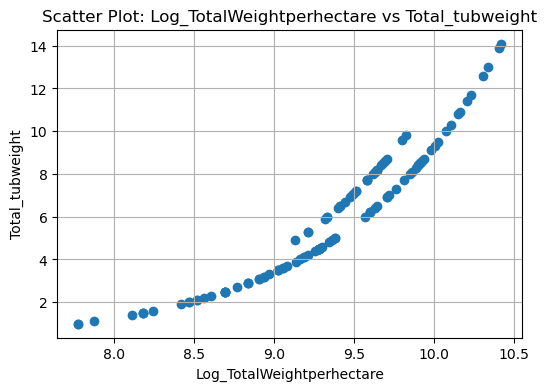

Pearson Correlation = 0.945, p-value = 0.0000


In [148]:
#Two continuous variables
analysis.analyze_continuous('Log_TotalWeightperhectare', 'Total_tubweight')


### Relationship between tillage  (categorical) and Log_TotalWeightperhectare (continuous) ###


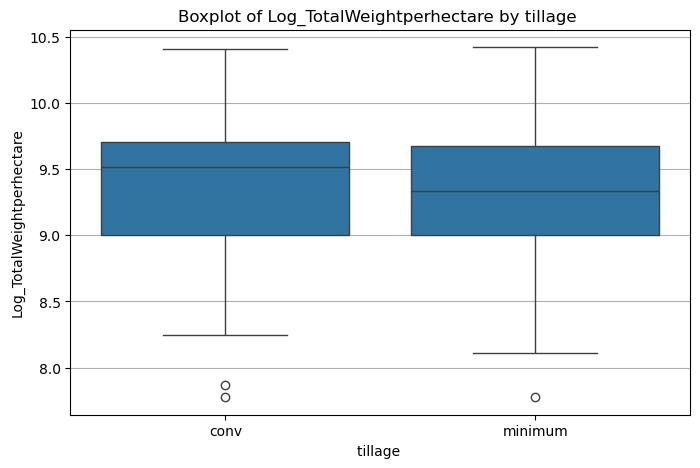

T-test between conv and minimum: p-value = 0.4890


In [149]:
#One continuous and one categorical variable
analysis.analyze_continuous_categorical('tillage ', 'Log_TotalWeightperhectare')


### Relationship between Sesn and locn ###

Contingency Table:
locn   1   2
Sesn        
1     25  30
2     30  30


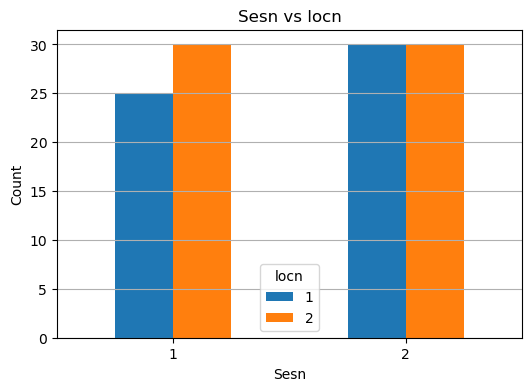


Chi-square = 0.090, p-value = 0.7637


In [150]:
#Two categorical variables
analysis.analyze_categorical('Sesn', 'locn')

ANALYSIS FOR SOROTI FARMERS (locn = 1) - FERTILIZER AND TILLAGE EFFECTS

[3a] Effect of Fertilizer Application (ferT) on Yield (ANOVA)


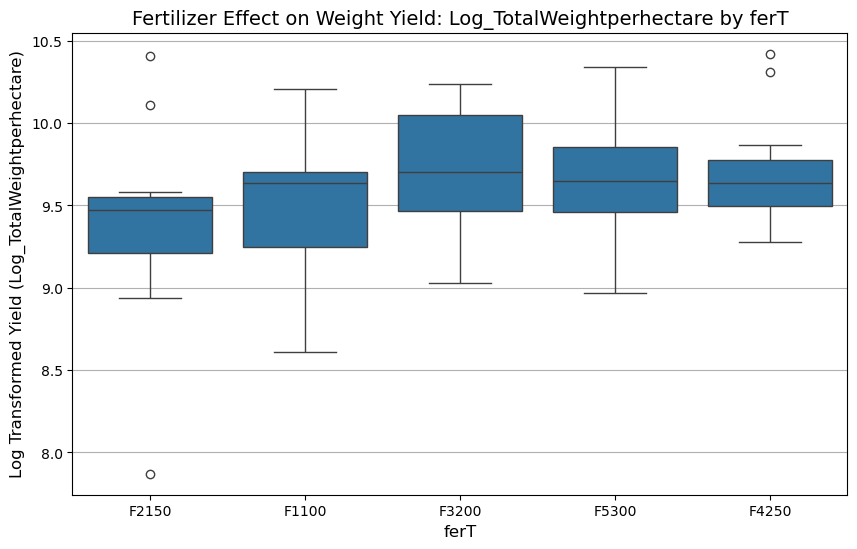

Total Weight Yield: F-statistic = 1.131, p-value = 0.3528


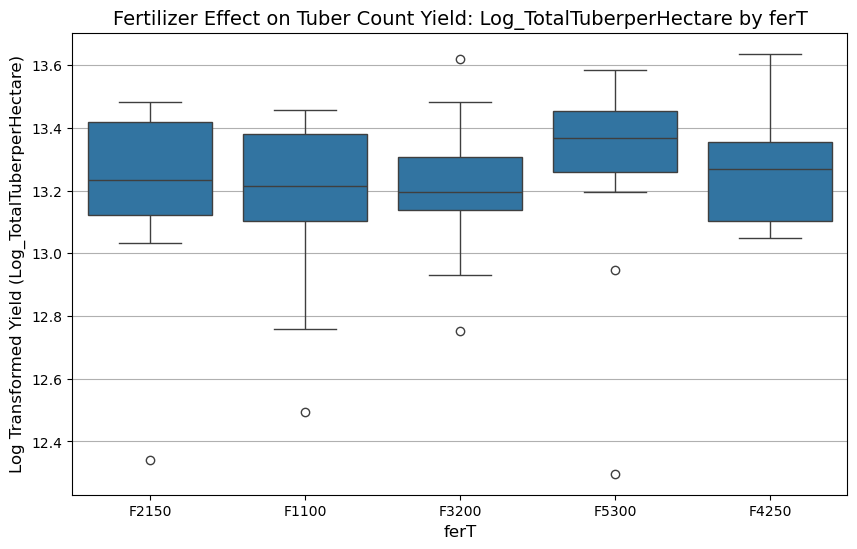

Total Tuber Count Yield: F-statistic = 0.244, p-value = 0.9119

[3b] Effect of Tillage Method (tillage) on Yield (T-Test)


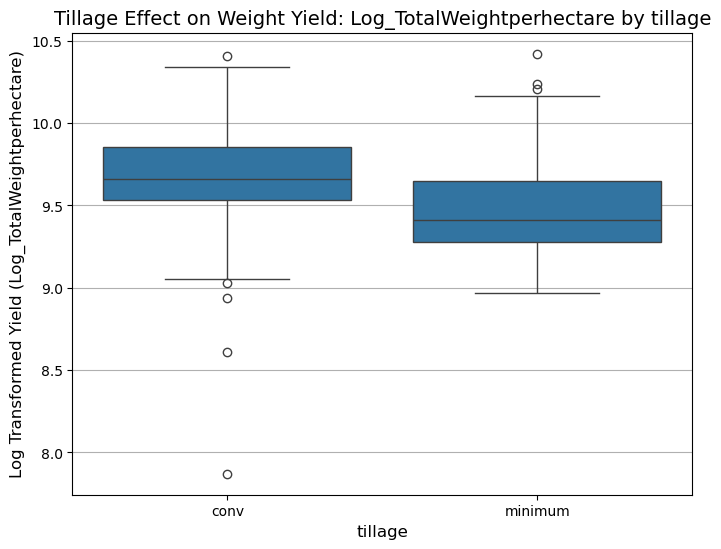

Total Weight Yield: T-test (conv vs minimum): p-value = 0.6421


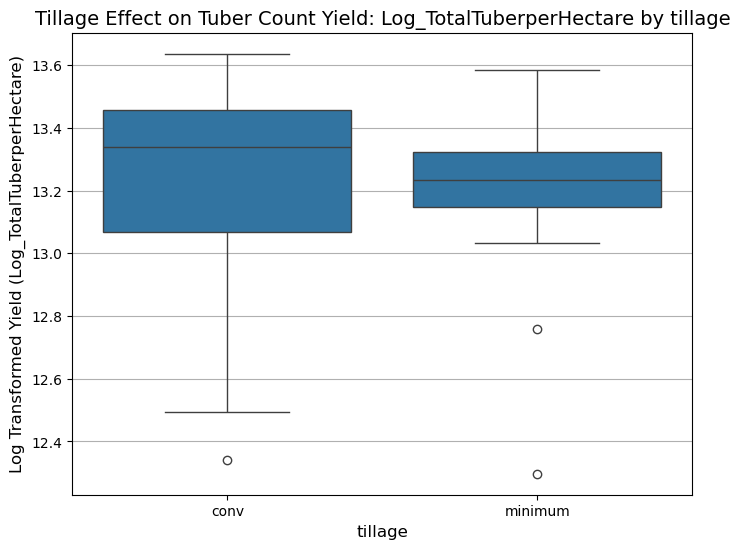

Total Tuber Count Yield: T-test (conv vs minimum): p-value = 0.6506


In [151]:
# Apply log transformation to the yield metrics
cassava['Log_TotalWeightperhectare'] = np.log1p(cassava['TotalWeightperhectare'])
cassava['Log_TotalTuberperHectare'] = np.log1p(cassava['TotalTuberperHectare'])

# Filter data for Soroti farmers (locn == 1)
cassava_soroti = cassava[cassava['locn'] == 1].copy()

# Ensure the 'tillage ' column is cleaned (remove trailing space)
cassava_soroti.columns = cassava_soroti.columns.str.strip()

# --- 2. Statistical Analysis Functions ---

def run_anova_and_plot(data, categorical_var, continuous_var, title_prefix):
    """Performs One-Way ANOVA and generates a boxplot for multiple groups (e.g., Fertilizer)."""
    # Create list of yield data for each unique fertilizer group
    groups = [data[data[categorical_var] == group][continuous_var] for group in data[categorical_var].unique()]
    
    # ANOVA Test
    f_stat, p_value = f_oneway(*groups)
    
    # Boxplot (Visualization)
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=categorical_var, y=continuous_var, data=data)
    plt.title(f'{title_prefix}: {continuous_var} by {categorical_var}', fontsize=14)
    plt.xlabel(categorical_var, fontsize=12)
    plt.ylabel(f"Log Transformed Yield ({continuous_var})", fontsize=12)
    plt.grid(axis='y')
    plt.show()

    return f_stat, p_value

def run_ttest_and_plot(data, categorical_var, continuous_var, title_prefix):
    """Performs Independent Samples T-Test and generates a boxplot for two groups (e.g., Tillage)."""
    groups = data[categorical_var].unique()
    g1 = data[data[categorical_var] == groups[0]][continuous_var]
    g2 = data[data[categorical_var] == groups[1]][continuous_var]
    
    # Welch's T-Test (used as it does not assume equal variances)
    t_stat, p_value = ttest_ind(g1, g2, equal_var=False)

    # Boxplot (Visualization)
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=categorical_var, y=continuous_var, data=data)
    plt.title(f'{title_prefix}: {continuous_var} by {categorical_var}', fontsize=14)
    plt.xlabel(categorical_var, fontsize=12)
    plt.ylabel(f"Log Transformed Yield ({continuous_var})", fontsize=12)
    plt.grid(axis='y')
    plt.show()

    return t_stat, p_value, groups

# --- 3. EXECUTION ---
print("="*80)
print("ANALYSIS FOR SOROTI FARMERS (locn = 1) - FERTILIZER AND TILLAGE EFFECTS")
print("="*80)

# a. Does fertilizer application affect yield? (ANOVA)
print("\n[3a] Effect of Fertilizer Application (ferT) on Yield (ANOVA)")

# 3a.1: Total Weight per hectare
f_w, p_w = run_anova_and_plot(cassava_soroti, 'ferT', 'Log_TotalWeightperhectare', 'Fertilizer Effect on Weight Yield')
print(f"Total Weight Yield: F-statistic = {f_w:.3f}, p-value = {p_w:.4f}")

# 3a.2: Total Tuber per Hectare
f_t, p_t = run_anova_and_plot(cassava_soroti, 'ferT', 'Log_TotalTuberperHectare', 'Fertilizer Effect on Tuber Count Yield')
print(f"Total Tuber Count Yield: F-statistic = {f_t:.3f}, p-value = {p_t:.4f}")


# b. Does tillage method affect yield? (T-test)
print("\n[3b] Effect of Tillage Method (tillage) on Yield (T-Test)")

# 3b.1: Total Weight per hectare
t_w, p_w, groups_w = run_ttest_and_plot(cassava_soroti, 'tillage', 'Log_TotalWeightperhectare', 'Tillage Effect on Weight Yield')
print(f"Total Weight Yield: T-test ({groups_w[0]} vs {groups_w[1]}): p-value = {p_w:.4f}")

# 3b.2: Total Tuber per Hectare
t_t, p_t, groups_t = run_ttest_and_plot(cassava_soroti, 'tillage', 'Log_TotalTuberperHectare', 'Tillage Effect on Tuber Count Yield')
print(f"Total Tuber Count Yield: T-test ({groups_t[0]} vs {groups_t[1]}): p-value = {p_t:.4f}")

ANALYSIS FOR SOROTI FARMERS (locn = 1) - FERTILIZER AND TILLAGE EFFECTS

 Effect of Fertilizer Application (ferT) on Yield (ANOVA)


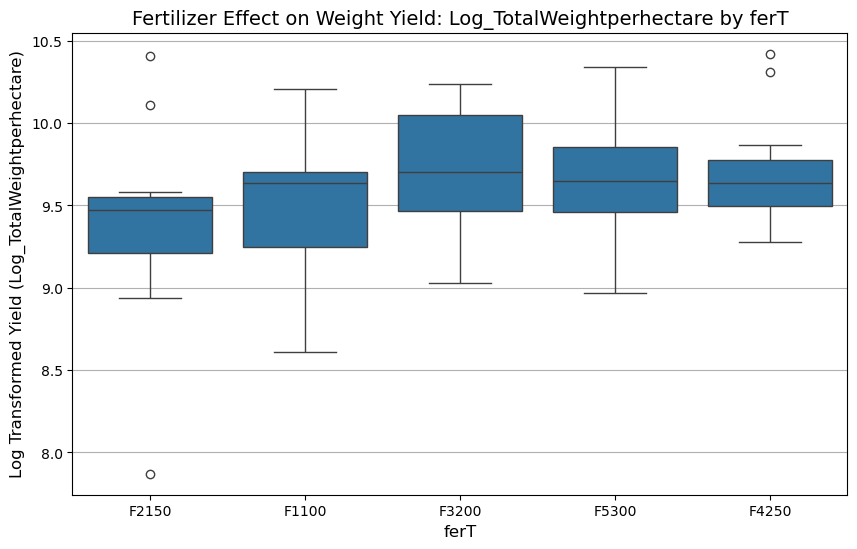

Total Weight Yield: F-statistic = 1.131, p-value = 0.3528


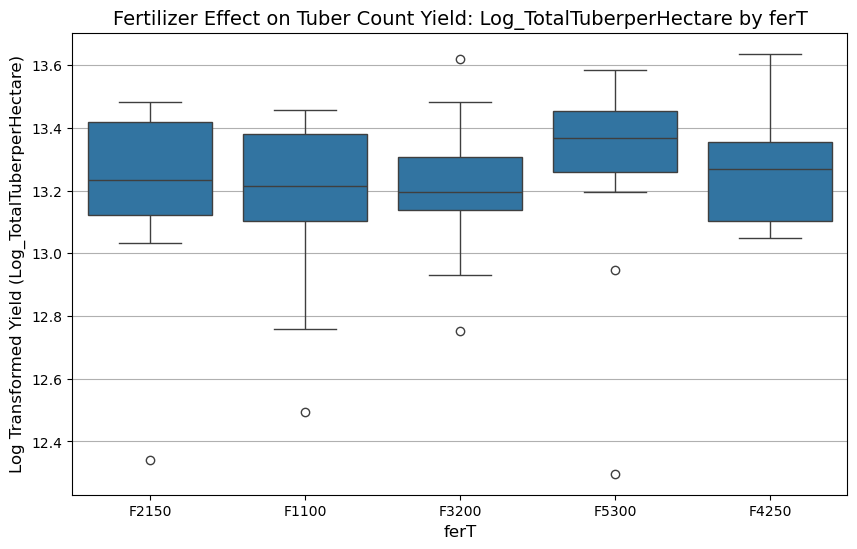

Total Tuber Count Yield: F-statistic = 0.244, p-value = 0.9119

[3b] Effect of Tillage Method (tillage) on Yield (T-Test)


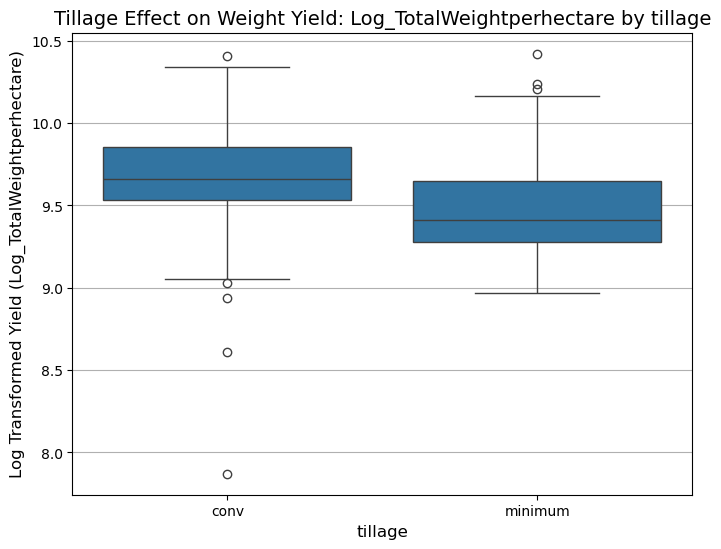

Total Weight Yield: T-test (conv vs minimum): p-value = 0.6421


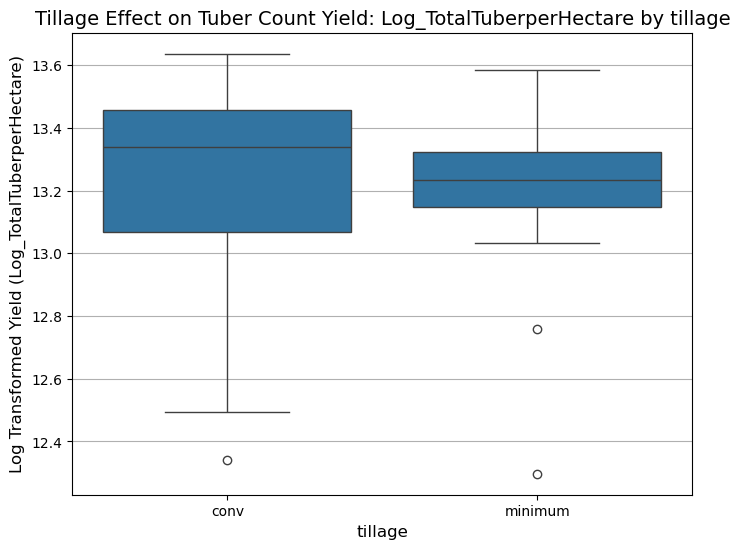

Total Tuber Count Yield: T-test (conv vs minimum): p-value = 0.6506


In [152]:
# Apply log transformation to the yield metrics
cassava['Log_TotalWeightperhectare'] = np.log1p(cassava['TotalWeightperhectare'])
cassava['Log_TotalTuberperHectare'] = np.log1p(cassava['TotalTuberperHectare'])

#Filter data for Soroti farmers (locn == 1)
cassava_soroti = cassava[cassava['locn'] == 1].copy()

#Ensure the 'tillage ' column is cleaned (remove trailing space)
cassava_soroti.columns = cassava_soroti.columns.str.strip()

# --- 2. Statistical Analysis Functions ---

def run_anova_and_plot(data, categorical_var, continuous_var, title_prefix):
    """Performs One-Way ANOVA and generates a boxplot for multiple groups (e.g., Fertilizer)."""
    # Create list of yield data for each unique fertilizer group
    groups = [data[data[categorical_var] == group][continuous_var] for group in data[categorical_var].unique()]
    
    # ANOVA Test
    f_stat, p_value = f_oneway(*groups)
    
    # Boxplot (Visualization)
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=categorical_var, y=continuous_var, data=data)
    plt.title(f'{title_prefix}: {continuous_var} by {categorical_var}', fontsize=14)
    plt.xlabel(categorical_var, fontsize=12)
    plt.ylabel(f"Log Transformed Yield ({continuous_var})", fontsize=12)
    plt.grid(axis='y')
    plt.show()

    return f_stat, p_value

def run_ttest_and_plot(data, categorical_var, continuous_var, title_prefix):
    """Performs Independent Samples T-Test and generates a boxplot for two groups (e.g., Tillage)."""
    groups = data[categorical_var].unique()
    g1 = data[data[categorical_var] == groups[0]][continuous_var]
    g2 = data[data[categorical_var] == groups[1]][continuous_var]
    
    # Welch's T-Test (used as it does not assume equal variances)
    t_stat, p_value = ttest_ind(g1, g2, equal_var=False)

    # Boxplot (Visualization)
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=categorical_var, y=continuous_var, data=data)
    plt.title(f'{title_prefix}: {continuous_var} by {categorical_var}', fontsize=14)
    plt.xlabel(categorical_var, fontsize=12)
    plt.ylabel(f"Log Transformed Yield ({continuous_var})", fontsize=12)
    plt.grid(axis='y')
    plt.show()

    return t_stat, p_value, groups

#EXECUTION
print("="*80)
print("ANALYSIS FOR SOROTI FARMERS (locn = 1) - FERTILIZER AND TILLAGE EFFECTS")
print("="*80)

#Does fertilizer application affect yield? (ANOVA)
print("\n Effect of Fertilizer Application (ferT) on Yield (ANOVA)")

#Total Weight per hectare
f_w, p_w = run_anova_and_plot(cassava_soroti, 'ferT', 'Log_TotalWeightperhectare', 'Fertilizer Effect on Weight Yield')
print(f"Total Weight Yield: F-statistic = {f_w:.3f}, p-value = {p_w:.4f}")

#Total Tuber per Hectare
f_t, p_t = run_anova_and_plot(cassava_soroti, 'ferT', 'Log_TotalTuberperHectare', 'Fertilizer Effect on Tuber Count Yield')
print(f"Total Tuber Count Yield: F-statistic = {f_t:.3f}, p-value = {p_t:.4f}")


#Does tillage method affect yield? (T-test)
print("\n[3b] Effect of Tillage Method (tillage) on Yield (T-Test)")

#Total Weight per hectare
t_w, p_w, groups_w = run_ttest_and_plot(cassava_soroti, 'tillage', 'Log_TotalWeightperhectare', 'Tillage Effect on Weight Yield')
print(f"Total Weight Yield: T-test ({groups_w[0]} vs {groups_w[1]}): p-value = {p_w:.4f}")

#Total Tuber per Hectare
t_t, p_t, groups_t = run_ttest_and_plot(cassava_soroti, 'tillage', 'Log_TotalTuberperHectare', 'Tillage Effect on Tuber Count Yield')
print(f"Total Tuber Count Yield: T-test ({groups_t[0]} vs {groups_t[1]}): p-value = {p_t:.4f}")

In [153]:
#Convert Sesn to string labels for better item interpretation
cassava['Sesn_Item'] = 'Sesn_' + cassava['Sesn'].astype(str)

#Select the two categorical factors (items) for association
item_columns = ['ferT', 'Sesn_Item']

#Create a list of transactions (each row is a plot, containing two items: ferT and Sesn_Item)
transactions = cassava[item_columns].values.tolist()

#Transaction Encoding (One-Hot Encoding)
#Apriori requires data to be in a one-hot encoded format.
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_onehot = pd.DataFrame(te_ary, columns=te.columns_)

#Run Apriori Algorithm ---
#Find frequent itemsets. Using min_support=0.10 (10% of 140 rows = 14 plots).
frequent_itemsets = apriori(df_onehot, min_support=0.10, use_colnames=True)

#Generate Association Rules
#Filter for strong rules using a lift metric threshold of 1.0 (no negative association)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

#Sort rules by confidence and lift
rules = rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].sort_values(
    by=['confidence', 'lift'], ascending=False
)

print("\n--- Frequent Itemsets ---")
print(frequent_itemsets)
print("\n--- Generated Association Rules (Sorted by Confidence & Lift) ---")
print(rules)


#The Apriori analysis is expected to show no strong association between any specific fertilizer application and a specific season. This result confirms the success of the balanced experimental design, where fertilizer treatments were applied uniformly across both seasons, preventing any confounding of these two factors.


--- Frequent Itemsets ---
     support         itemsets
0   0.200000          (F1100)
1   0.200000          (F2150)
2   0.200000          (F3200)
3   0.200000          (F4250)
4   0.200000          (F5300)
5   0.478261         (Sesn_1)
6   0.521739         (Sesn_2)
7   0.104348  (F1100, Sesn_2)
8   0.104348  (Sesn_2, F2150)
9   0.104348  (F3200, Sesn_2)
10  0.104348  (F4250, Sesn_2)
11  0.104348  (F5300, Sesn_2)

--- Generated Association Rules (Sorted by Confidence & Lift) ---
  antecedents consequents   support  confidence  lift
0     (F1100)    (Sesn_2)  0.104348    0.521739   1.0
1     (F2150)    (Sesn_2)  0.104348    0.521739   1.0
2     (F3200)    (Sesn_2)  0.104348    0.521739   1.0
3     (F4250)    (Sesn_2)  0.104348    0.521739   1.0
4     (F5300)    (Sesn_2)  0.104348    0.521739   1.0


In [155]:
#Clean the 'tillage ' column name
cassava.columns = cassava.columns.str.strip()

#Define Features (X) and Target (y)
y = cassava['Plants_harvested']
features = ['Sesn', 'locn', 'tillage', 'ferT']
X = cassava[features]

#Feature Engineering (One-Hot Encoding Categorical Variables) ---
X_encoded = pd.get_dummies(X, columns=['Sesn', 'locn', 'tillage', 'ferT'], drop_first=True)

#Split Data
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.3, random_state=42
)

#Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#Evaluation and Reporting
r_squared = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

#Coefficients (Model structure)
coefficients = pd.Series(model.coef_, index=X_encoded.columns).sort_values(ascending=False)
intercept = model.intercept_

#Output Model Summary
model_summary = pd.DataFrame({
    'Feature': coefficients.index,
    'Coefficient': coefficients.values
})
model_summary['Absolute_Coefficient'] = model_summary['Coefficient'].abs()
model_summary = model_summary.sort_values(by='Absolute_Coefficient', ascending=False).drop(columns=['Absolute_Coefficient'])
model_summary.to_csv('Plants_Harvested_Model_Summary.csv', index=False)